Лабораторна робота №2
Баш Анастасія
МІТ-31

Завдання №1
Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

In [4]:
from sklearn.datasets import make_regression
import pandas as pd

# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000, n_features=5, noise=10, random_state=42)

# Створюємо DataFrame для легшої роботи з даними
columns = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']
regression_data = pd.DataFrame(X, columns=columns)
regression_data['Target'] = y

# Виведення перших рядків DataFrame
print(regression_data.head())

# Запис результатів у CSV файл
regression_data.to_csv('regression_dataset.csv', index=False)

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0   2.056544   0.606851   0.482688  -1.130888   0.420094  70.771314
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -51.604236
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -37.000448
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -83.535099
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -83.400394


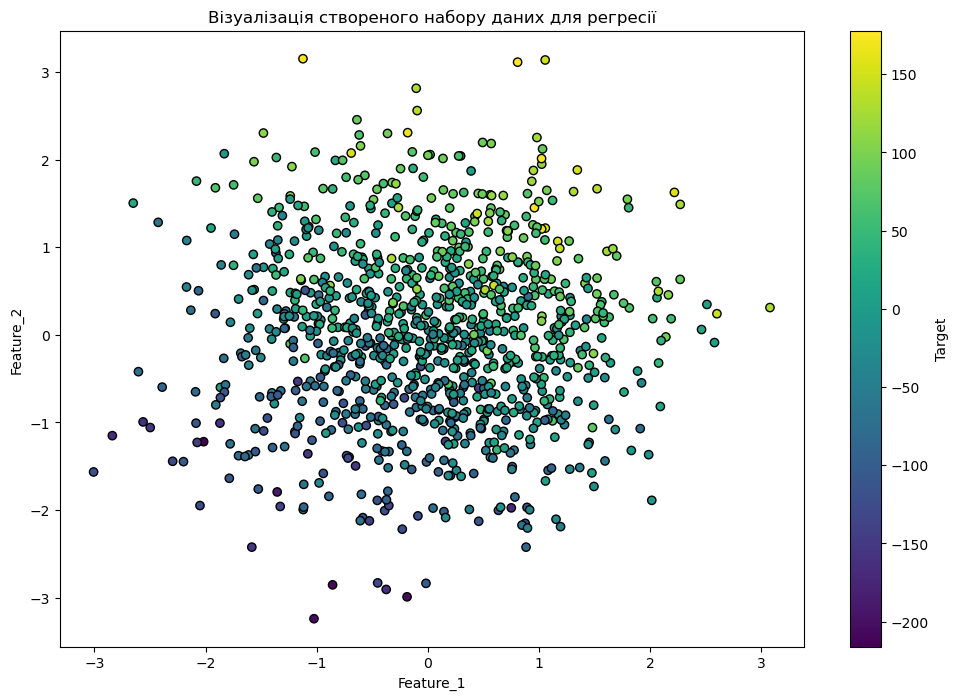

In [5]:
import matplotlib.pyplot as plt

# Визначення розмірів графіка
plt.figure(figsize=(12, 8))

# Візуалізація двох ознак та цільової змінної
plt.scatter(regression_data['Feature_1'], regression_data['Feature_2'], c=regression_data['Target'], cmap='viridis', marker='o', edgecolors='k')

# Додавання міток та назв
plt.title('Візуалізація створеного набору даних для регресії')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')

# Додавання колірної шкали
cbar = plt.colorbar()
cbar.set_label('Target')

# Виведення графіка
plt.show()

Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

In [6]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('regression_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

Mean Squared Error: 110.90609683464677
R-squared: 0.9710547889268921


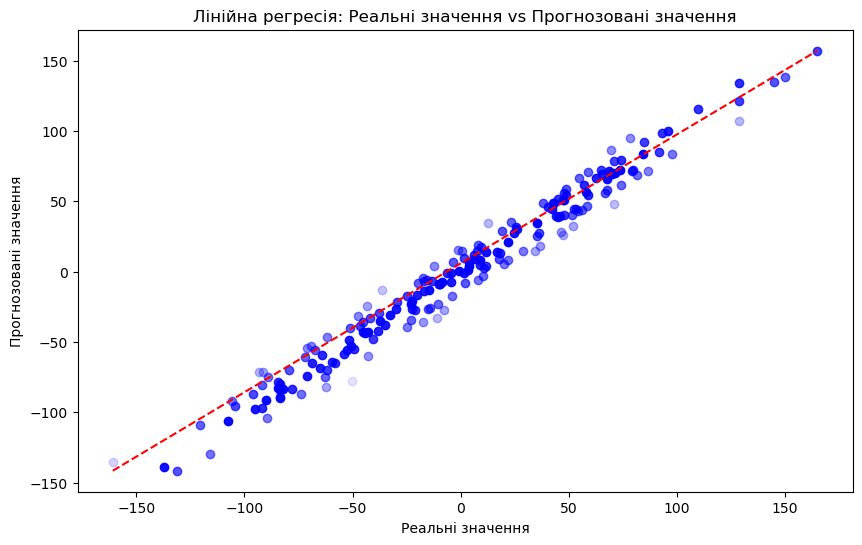

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виведення результатів
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Відстань між справжніми та прогнозованими значеннями
distances = np.abs(y_test - y_pred)
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distances)


# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred[i], c='b', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія: Реальні значення vs Прогнозовані значення")
plt.show()

In [8]:
import pandas as pd

# Обчислення матриці кореляції
correlation_matrix = data.corr()

# Виведення матриці кореляції
print("Матриця кореляції:")
print(correlation_matrix)

Матриця кореляції:
           Feature_1  Feature_2  Feature_3  Feature_4  Feature_5    Target
Feature_1   1.000000  -0.001540  -0.009325  -0.014426  -0.025040  0.396538
Feature_2  -0.001540   1.000000   0.059009  -0.000272  -0.008256  0.720094
Feature_3  -0.009325   0.059009   1.000000   0.014315  -0.019603  0.291849
Feature_4  -0.014426  -0.000272   0.014315   1.000000   0.009655  0.372480
Feature_5  -0.025040  -0.008256  -0.019603   0.009655   1.000000  0.288152
Target      0.396538   0.720094   0.291849   0.372480   0.288152  1.000000


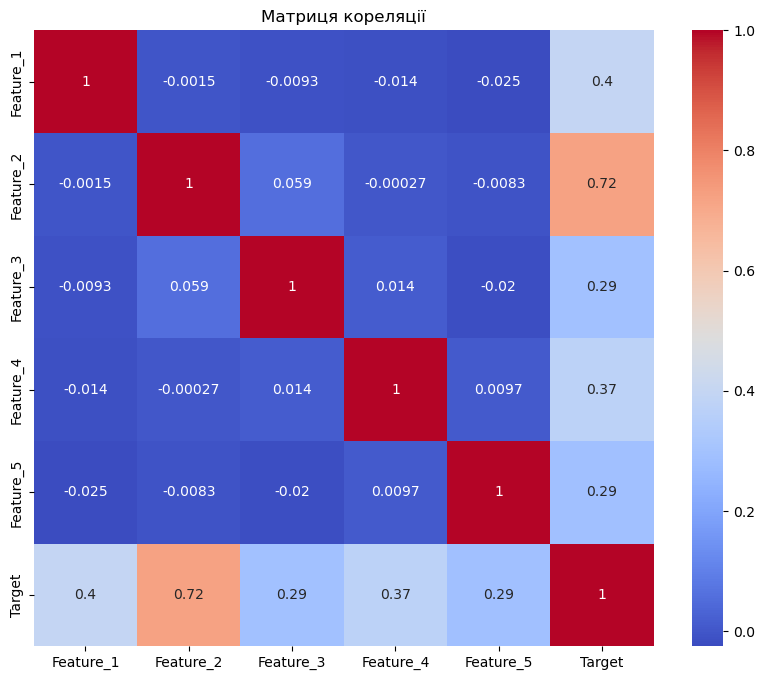

In [9]:
import seaborn as sns

# Визначення розмірів графіка
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

Завдання №2
Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

In [10]:
temp_df = pd.read_csv('daily-max-temperatures.csv', parse_dates=['Date'], index_col='Date')
temp_df.head()

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5
